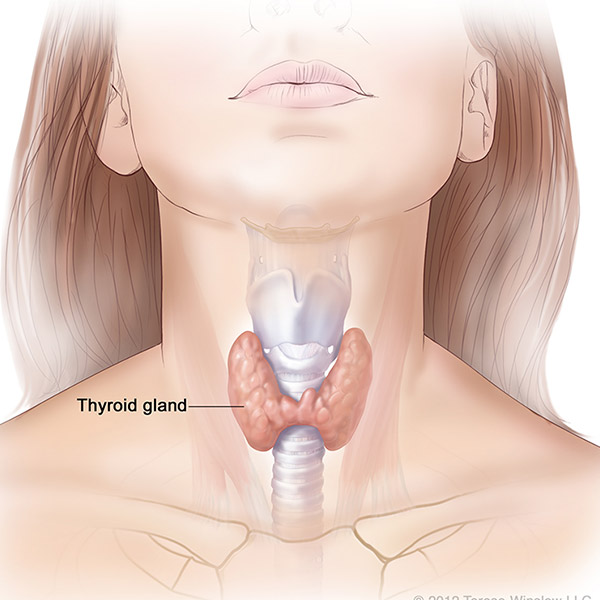

In [1]:
from IPython.display import Image
Image(filename = "thyroid_glands.jpg", width = 350, height = 100, embed = True)

Source: https://www.niddk.nih.gov/health-information/endocrine-diseases/hyperthyroidism

# 1. Introduction 

## 1.1. Problem Statement
Create a model that can classify whether a person is diagnosed with hypothyroidism or not.

## 1.2. Context

### 1.2.1 Description
Hypothyroidism is a disorder where the thyroid gland does not produce enough thyroid hormones to meet the needs of the body. The thyroid gland is found in the front of the neck below the larynx, or voice box, and has two lobes, one on each side of the windpipe (see image above). It generates hormones which are chemical messengers that relay information to the organs and tissues of the body, controlling processes such as metabolism, growth, and mood. Hypothyroidism is also called underactive thyroid or low thyroid. 

The thyroid gland secretes a hormone called thyroxine (**T4**) which contains 4 iodine atoms. It is then converted to triiodothyronine (**T3**) by removing one of the iodine atoms. The amount of T4 produced by the thyroid gland is controlled by another hormone, which is made in the pituitary gland located at the base of the brain called thyroid stimulating hormone (**TSH**). The amount of TSH that the pituitary sends into the bloodstream depends on the amount of T4 that it sees. If there is very little T4, then it produces more TSH to tell the thyroid gland to produce more T4.

T4 and T3 are almost certainly bound to transport proteins. If the levels of these transport proteins changes, there can be changes in how much bound T4 and T3 is measured. This frequently happens during pregnancy and with the use of birth control pills.

Free Thyroxine Index (**FTI**) is an estimation of the free T4 concentration, and is considered a more reliable indicator of thyroid status in the presence of abnormalities in plasma protein binding. It is low in hypothyroidism.

High TSH and low FTI indicate the presence of primary hypothyroidism (problem is with the thyroid gland) while low TSH and low FTI indicate the presence of secondary hypothyriodism (the problem is with the pituitary gland).  

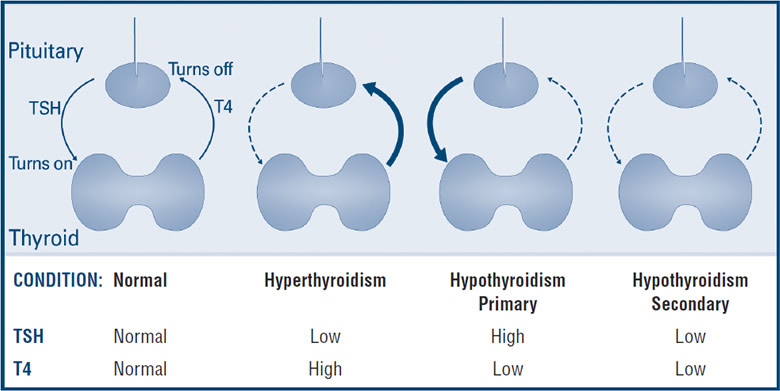

In [2]:
Image(filename = "hypothyroidism.jpg")

Source: https://www.thyroid.org/thyroid-function-tests/

### 1.2.2 Symptoms
Hypothyroidism can lead to such issues as:
* poor cold tolerance
* dry skin
* feelings of tiredness
* constipation
* slowed heart rate
* depression
* weight gain
* etc.

Untreated cases during pregnancy can lead to delays in the growth and intellectual development of the baby.

### 1.2.3 Causes
Hypothyroidism can be caused by:
* Autoimmune diseases
* Over-response to hyperthyroidism treatment
* Thyroid surgery
* Radiation therapy
* Medication
* Congenital diseases
* Pituitary disorder
* Pregnancy
* Iodine deficiency

### 1.2.4 Risk factors
Chances of you being at risk are high if you:
- are a woman
- are older than 60
- have a family history of thyroid disease
- have an autoimmue disease, such as Type 1 diabetes or celiac disease
- have been treated with radioactive iodine or anti-thyroid medications
- received radiation to your neck or upper chest
- have had thyroid surgery
- have been pregnant or delivered within the past 6 months

### 1.2.5 References
Sources:
* https://www.thyroid.org/thyroid-function-tests/
* https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284
* https://www.medicalnewstoday.com/articles/163729#treatment
* https://en.wikipedia.org/wiki/Hypothyroidism
* https://www.healthline.com/nutrition/hypothyroidism-symptoms
* https://www.glowm.com/resources/glowm/cd/pages/resources/Lab/Thyroid_Function_Tests.htm#FTI
* https://www.researchgate.net/publication/339404796_A_Study_on_Label_TSH_T3_T4U_TT4_FTI_in_Hyperthyroidism_and_Hypothyroidism_using_Machine_Learning_Techniques#fullTextFileContent

## 1.3. Methodology
1. Introduction
2. Data preparation and cleaning
    1.1 Loading libraries and dataset
    1.2 Dealing with missing data and duplicates
    1.3 Dealing with outliers
3. Exploratory Data Analysis
4. Data Modeling
    4.1 Decision Trees
    4.2 Random Forest
    4.3 K-Nearest Neighbor
5. Summary and Recommendations

## 1.4. Metric for Success

# 2. Data Preparation & Cleaning

## 2.1. Loading libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max.rows", None)
pd.set_option("display.max.columns", None)

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 6)

In [4]:
df = pd.read_csv('hypothyroid.csv')
df.sample(5)

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2653,negative,67,F,f,f,f,f,f,t,f,f,f,f,t,n,?,n,?,y,55,y,1.04,y,53,y,23
625,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.9,y,142,y,1.02,y,139,n,?
592,negative,52,F,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,y,61,y,1.4,y,44,n,?
3067,negative,78,M,f,f,f,f,f,t,f,f,f,f,f,y,0,y,1.8,y,107,y,0.86,y,124,n,?
493,negative,51,F,t,f,f,f,f,f,f,f,f,f,t,y,0.4,y,1.6,y,88,y,1.05,y,85,n,?


In [5]:
# previewing basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 3163 non-null   object
 1   Age                        3163 non-null   object
 2   Sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

Our data set has 3,163 rows and 26 columns. On closer inspection, we see that all our columns are categorical in nature. This lack of variability in data types is suspicious especially when we can see from the data set's preview that variables like 'age', 'T3', 'TSH', and so on should be numerical.

In [6]:
df.rename(columns = {'Unnamed: 0' : 'diagnosis'}, inplace = True)
df.head()

,diagnosis,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


## 2.2. Dealing with missing data & duplicates

In [7]:
# drop duplicates, if any
old_no_of_records = df.shape[0]
df.drop_duplicates(inplace = True)
new_no_of_records = df.shape[0]
print("{} duplicated records removed".format(old_no_of_records - new_no_of_records))

77 duplicated records removed


In the summary provided, we see that there don't appear to be any null values. However, since all variables are in object data type, it is possible that the null values could be in the form of a character or string of characters. To investigate if this is the case, we will go through each variable and see what its unique values are.

In [8]:
cols = df.columns
for col in cols:
    print("Column: {}".format(col))
    print("Number of unique values: {}".format(df[col].nunique()))
    print(df[col].unique())
    print()

Column: diagnosis
Number of unique values: 2
['hypothyroid' 'negative']

Column: Age
Number of unique values: 93
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']

Column: Sex
Number of unique values: 3
['M' 'F' '?']

Column: on_thyroxine
Number of unique values: 2
['f' 't']

Column: query_on_thyroxine
Number of unique values: 2
['f' 't']

Column: on_antithyroid_medication
Number of unique values: 2
['f' 't']

Column: thyroid_surgery
Number of unique values: 2
['f' 't']

Column: query_hypothyroid
Number of unique values: 2
['f' 't']

Column: query_hyperthyroid
Number of unique v

From the above operation, we can see that the missing values are in the form of a question mark '?'. We can now remove that and replace it with np.NAN so as to be able to deal with the missing values.

In [9]:
for col in cols:
    df[col] = df[col].replace('?', np.nan)
    
# preview distribution of missing values
df.isna().sum()

diagnosis                       0
Age                           438
Sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [10]:
# converting to appropriate datatypes
convert_to_float = np.array(['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'])

for col in convert_to_float:
    df = df.astype({col : 'float64'})
    print(col, ":", df[col].dtypes)

Age : float64
TSH : float64
T3 : float64
TT4 : float64
T4U : float64
FTI : float64
TBG : float64


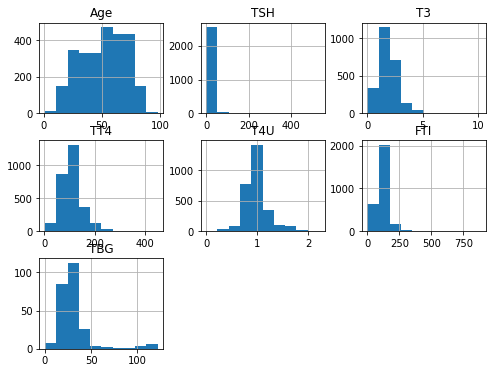

In [11]:
# previewing histogram of numerical variables
df.hist()
plt.show()

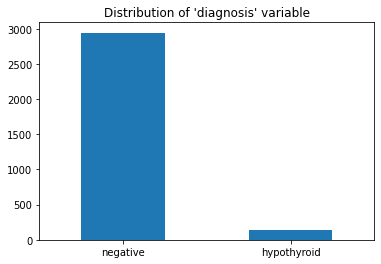

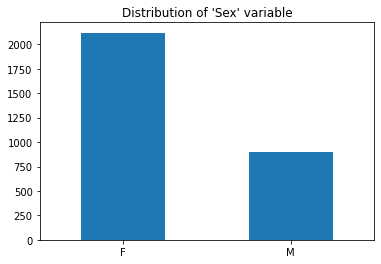

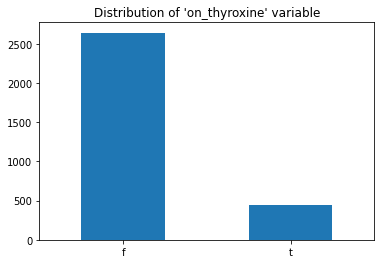

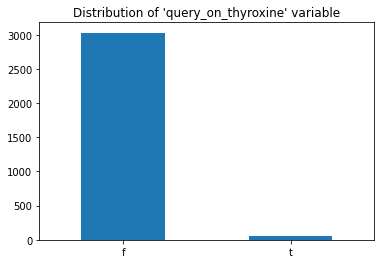

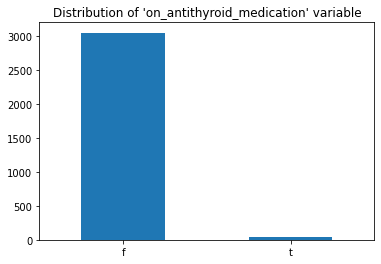

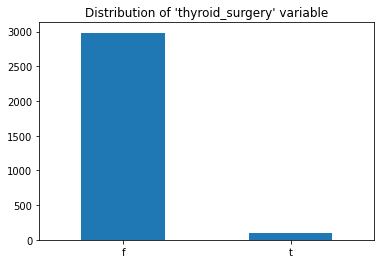

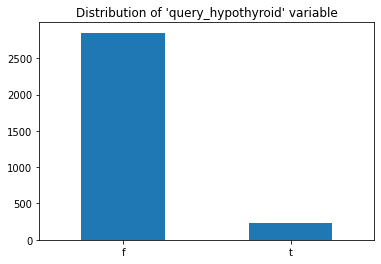

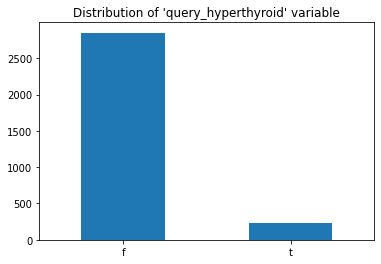

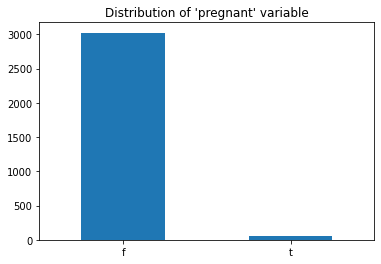

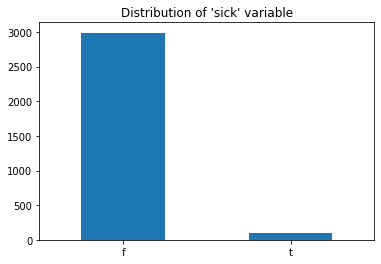

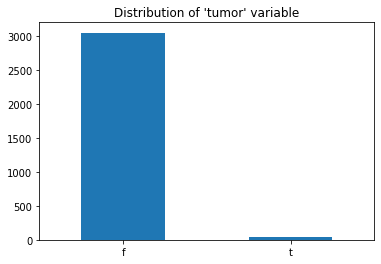

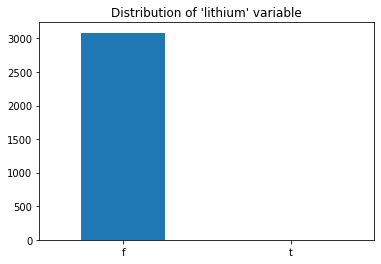

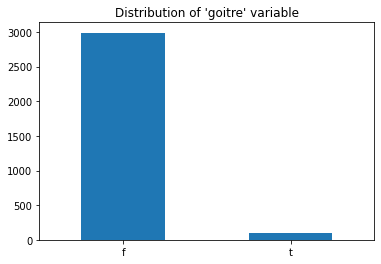

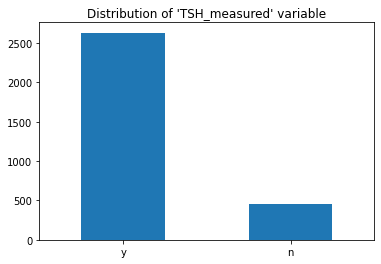

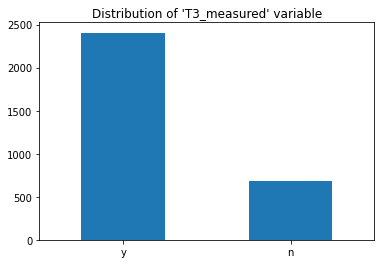

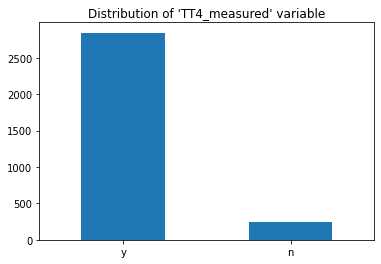

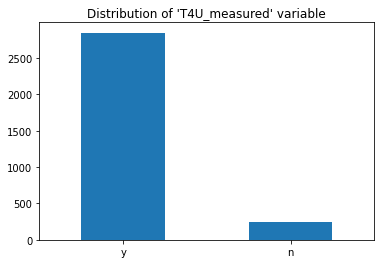

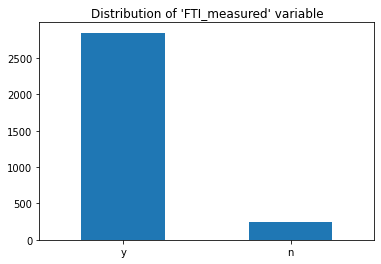

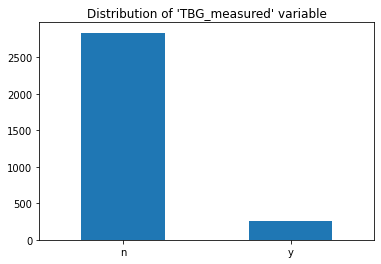

In [12]:
# previewing bar charts of categorical variables
categorical = list(df.columns)
categorical.remove('Age')
categorical.remove('TSH')
categorical.remove('T3')
categorical.remove('TT4')
categorical.remove('T4U')
categorical.remove('FTI')
categorical.remove('TBG')

for cat in categorical:
    plt.figure(figsize = (6, 4))
    df[cat].value_counts().plot(kind = 'bar', rot = 0)
    plt.title("Distribution of '{}' variable".format(cat))
    plt.show()

From the histograms of the numerical variables and bar charts of the categorical variables, it is clear that using one of the measures of central tendency (mean, median, mode) will not properly impute the missing values. We will therefore encode our categorical variables and impute the missing values using Sklearn's KNNImputer.

In [13]:
# create function to binarize categorical values
def encode(value):
    if (value == 'negative') or (value == 'M') or (value == 'f') or (value == 'n'):
        value = 0
        return value
    
    elif (value == 'hypothyroid') or (value == 'F') or (value == 't') or (value == 'y'):
        value = 1
        return value
    else:
        return value
        
for col in cols:
    df[col] = df[col].apply(lambda x : encode(x))
    
df.head()

,diagnosis,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,NaN
1,1,15.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,NaN
2,1,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,NaN
3,1,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,NaN
4,1,77.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,NaN


In [14]:
# scale the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,diagnosis,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1.0,0.731959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.056604,1.0,0.058824,1.0,0.029018,1.0,0.669683,1.0,0.011351,0.0,NaN
1,1.0,0.144330,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.273585,1.0,0.166667,1.0,0.037946,1.0,0.511312,1.0,0.019296,0.0,NaN
2,1.0,0.237113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.019608,1.0,0.004464,1.0,0.452489,1.0,0.000000,0.0,NaN
3,1.0,0.237113,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.811321,1.0,0.039216,1.0,0.008929,1.0,0.470588,1.0,0.006810,0.0,NaN
4,1.0,0.783505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.013774,1.0,0.117647,1.0,0.122768,1.0,0.579186,1.0,0.049943,0.0,NaN


In [15]:
# imputing the missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

# confirming that no missing values remain
df.isna().sum()

diagnosis                    0
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [16]:
# returning to original, non-scaled version
df = pd.DataFrame(scaler.inverse_transform(df), columns = df.columns)
df.head()

,diagnosis,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,1.0,0.6,1.0,15.0,1.0,1.48,1.0,10.0,0.0,45.0
1,1.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,145.0,1.0,1.7,1.0,19.0,1.0,1.13,1.0,17.0,0.0,27.6
2,1.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.2,1.0,4.0,1.0,1.00,1.0,0.0,0.0,45.0
3,1.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,430.0,1.0,0.4,1.0,6.0,1.0,1.04,1.0,6.0,0.0,27.8
4,1.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.3,1.0,1.2,1.0,57.0,1.0,1.28,1.0,44.0,0.0,45.0


In [17]:
# check all variables to ensure they're in the correct format
for col in list(df.columns):
    print(col)
    print(df[col].unique())
    print()

diagnosis
[1. 0.]

Age
[72.  15.  24.  77.  85.  64.  20.  42.  69.  75.  53.  59.  68.  50.
 78.  65.  28.  43.  40.  84.  53.2 83.  63.  73.  36.  27.  48.  71.
 60.  34.  74.6 79.  62.  74.  32.  46.8 41.  67.2 45.8 63.4 60.6 70.
 29.  55.4 48.4  5.  58.  35.  51.  22.  16.  49.6 44.  39.  47.  56.4
 18.  17.  88.  56.  74.4 54.  30.  45.  66.  63.8 58.8 52.  47.4 47.6
 53.6 35.6 80.  33.  38.  72.4 92.  67.  46.8 46.  13.  89.  35.4 51.2
 61.  49.  59.8 26.  41.  30.2 44.  65.4 57.  31.  90.  81.  55.8 25.
 37.  38.8 38.4 52.8 62.2 76.  87.  57.  23.  55.  86.  52.6 98.  60.6
 39.4 59.2 21.  48.  70.8 51.6 47.4 97.  75.4 69.2  1.   6.  68.6 62.8
 64.2 51.4 14.  62.6 68.2 76.4 56.8 54.8 43.6 82.  45.2 61.2 52.2 42.2
 65.  44.4 45.4 52.6 46.2 67.8 68.4 51.8 60.8 63.6 54.2 53.4 69.4 11.
 51.4 71.6 28.  37.2 49.8 71.8 48.6 46.6 19.   9.  50.  48.8 52.  57.4
 59.4 12.  50.6 76.  48.4 53.  39.6 42.6 37.4 43.4 56.8 71.2 58.4 31.8
 57.8 10.  46.4 41.6 41.8 36.6 64.8 52.8 52.4 55.6 31.6 71.

We see that the 'Sex' variable is not quite right so we will make the necessary corrections.

In [18]:
df['Sex'] = df['Sex'].replace({
    0.8 : 1.,
    0.6 : 1.,
    0.4 : 0.,
    0.2 : 0.
})
# confirm it has been changed
df.Sex.unique()

array([0., 1.])

## 2.3. Dealing with outliers

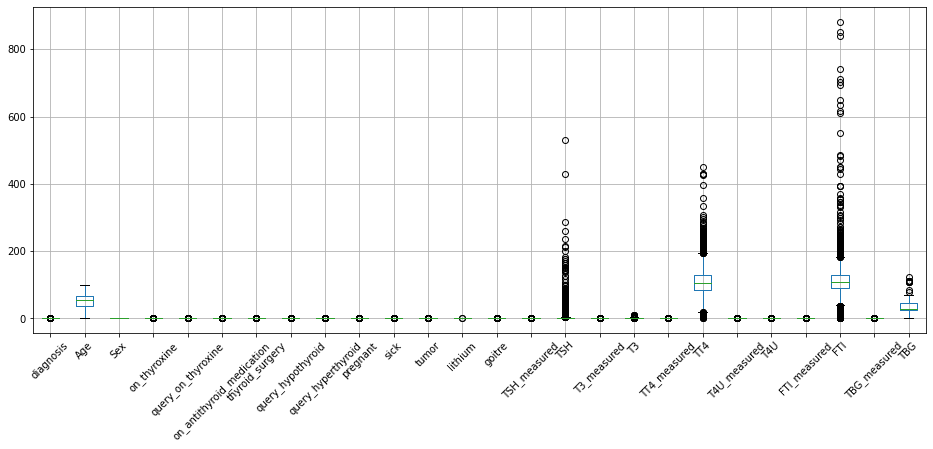

In [19]:
plt.figure(figsize = (16, 6))
columns = df.columns.to_list()
df.boxplot(columns)
plt.xticks(rotation = 45)
plt.show()

For the time being, I will not remove and/or deal with the outliers, but I will keep their existence in mind.

# 3. Exploratory Data Analysis

We will base our exploratory analysis around the 'diagnosis' variable which will be our target variable.

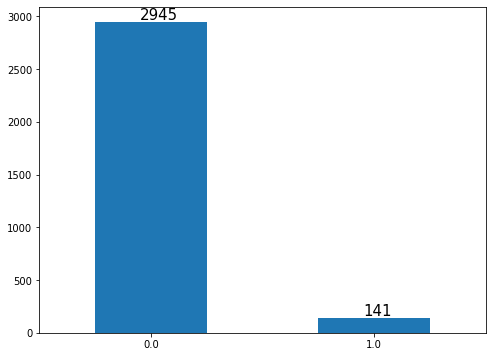

In [20]:
# get distribution of 'diagnosis'
ax = df.diagnosis.value_counts().plot(kind = 'bar', rot = 0)
for i in ax.patches:
    ax.text(i.get_x() + 0.20, i.get_height() + 25, 
           str(round(i.get_height(), 2)), fontsize = 15)

array([<AxesSubplot:ylabel='age_group'>], dtype=object)

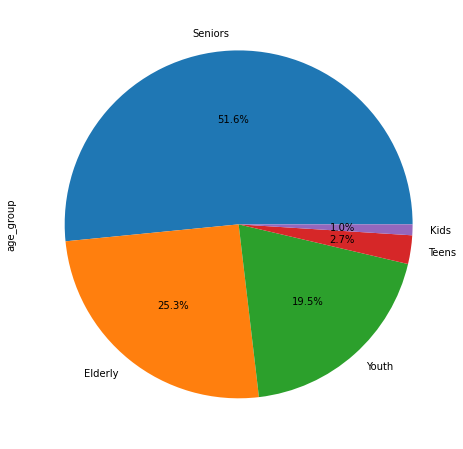

In [21]:
# splitting age into 4 distinct age groups
conditions = [
    ((df.Age >= 0) & (df.Age <= 13)),
    ((df.Age >= 13) & (df.Age <= 18)),
    ((df.Age >= 18) & (df.Age <= 35)),
    ((df.Age >= 35) & (df.Age <= 65)),
    df.Age >= 65
]
choices = ['Kids', 'Teens', 'Youth', 'Seniors', 'Elderly']

df['age_group'] = np.select(conditions, choices)


# plotting the distribution of the age groups in a pie chart
df.age_group.value_counts().plot(kind = 'pie', autopct = '%0.1f%%',
                                       figsize = [10, 8], subplots = True)

From the pie chart, we see that seniors (35-65) make up the vast majority of the patient records, followed by the elderly and then the youth.

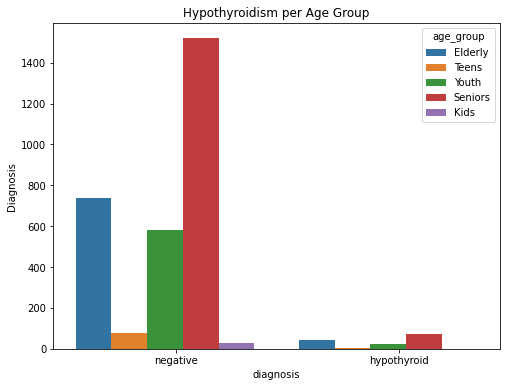

In [22]:
# distribution of diagnosis across age groups
diag_age = sns.countplot('diagnosis', hue = 'age_group', data = df)
diag_age.set(title = "Hypothyroidism per Age Group", ylabel = 'Diagnosis')
plt.xticks(ticks = [0.05, 1.05], labels = ['negative', 'hypothyroid'])
plt.show()

The number of patients who tested positive for hypothyroidism is disproportionately small compared to that of those who tested negative.

In [23]:
# hypothyroidism per gender 
df.groupby('Sex').pregnant.value_counts()

Sex  pregnant
0.0  0.0          921
1.0  0.0         2104
     1.0           61
Name: pregnant, dtype: int64

In [24]:
# hypothyroidism per pregnancy status
df.groupby('diagnosis').pregnant.value_counts()

diagnosis  pregnant
0.0        0.0         2885
           1.0           60
1.0        0.0          140
           1.0            1
Name: pregnant, dtype: int64

Of the 61 pregnant women in our dataset, only 1 had hypothyroidism. Not only is this not generalizable, it is also too biased in determining whether pregnancy is a factor influencing hypothyroidism.

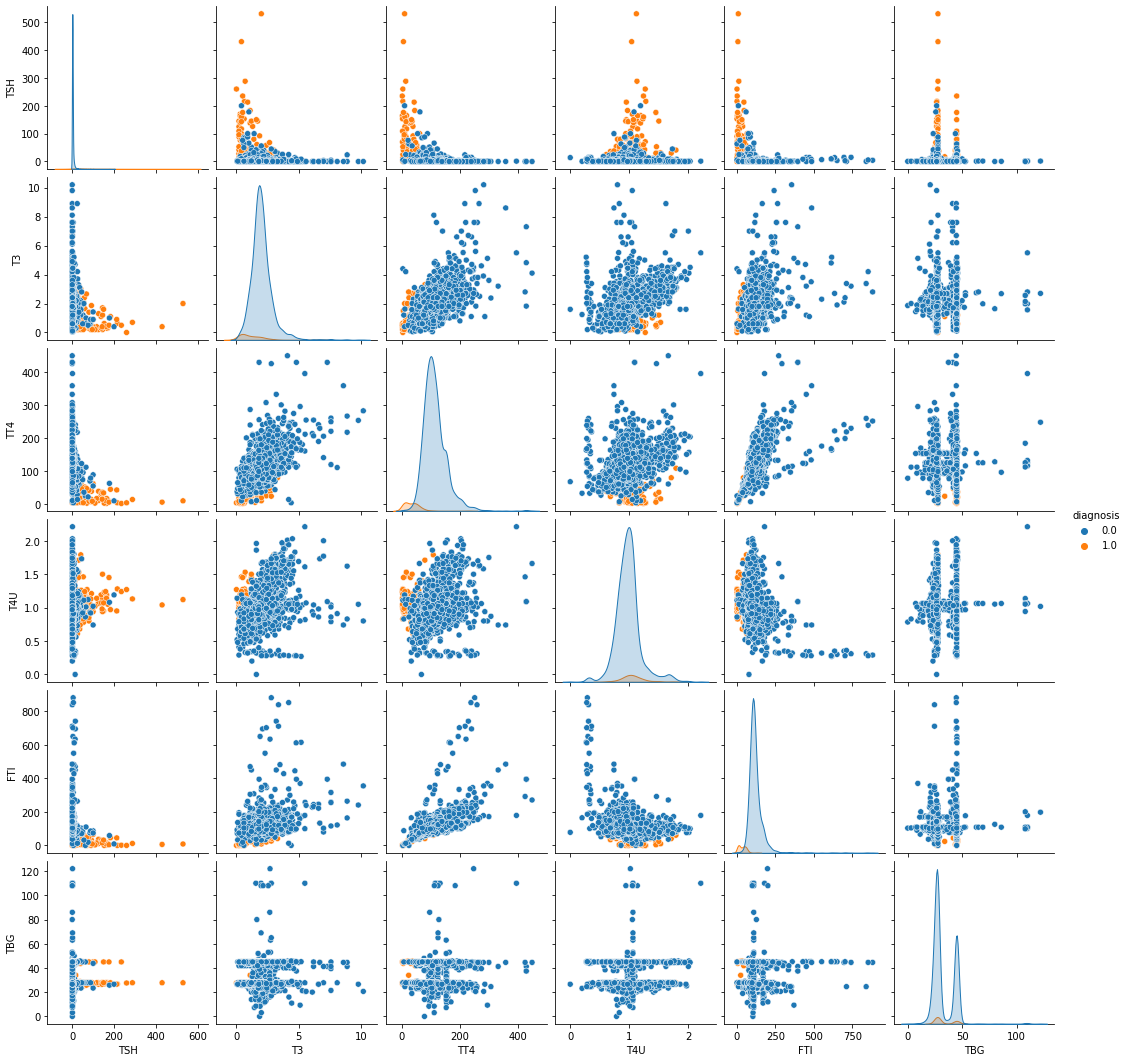

In [25]:
# scatterplot of test results
numerical = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

sns.pairplot(df, kind = "scatter", diag_kind = "kde", vars = numerical,
            hue = "diagnosis")
plt.show()

Hyperthyroidism shows up more in TSH tests, indicating that that test is an important factor influencing it

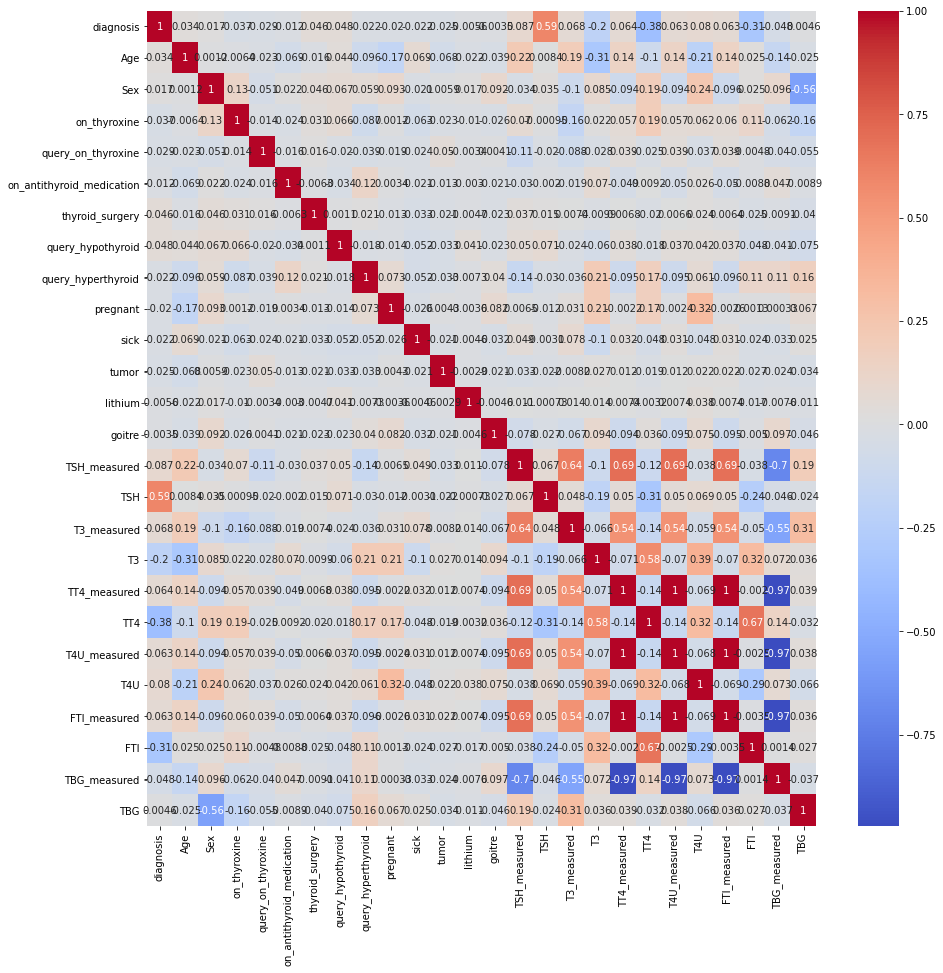

In [26]:
# checking correlation
plt.figure(figsize = (15, 15))
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

We see that 'TT4_measured' is perfectly correlated with 'T4U_measured' and 'FTI_measured' while 'TBG_measured' is almost perfectly negatively correlated with 'TT4_measured', 'T4U_measured', and 'FTI_measured'. This is proof of redundancy within the dataset so we will remove 'TT4_measured', 'T4U_measured' and 'FTI_measured'.

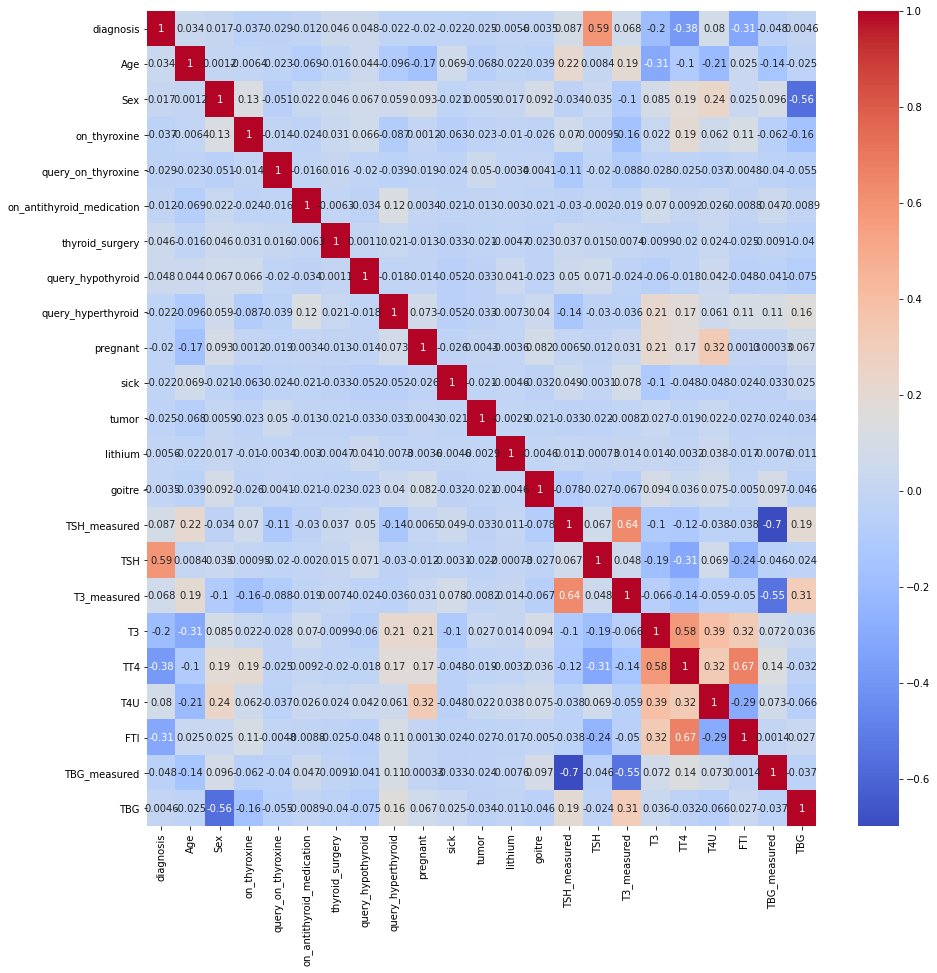

In [27]:
df = df.drop(columns = ['TT4_measured', 'T4U_measured', 'FTI_measured'])
plt.figure(figsize = (15, 15))
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

The Variance Inflation Factor (VIF) score of an independent variable represents how well the variable is explained by other independent variables. A general rule of thmb for interpreting VIF is that if there is a VIF score between 1-5, there is moderate correlation while a score greater than 5 indicates high correlation which will prove to be problematic during the modeling phase.

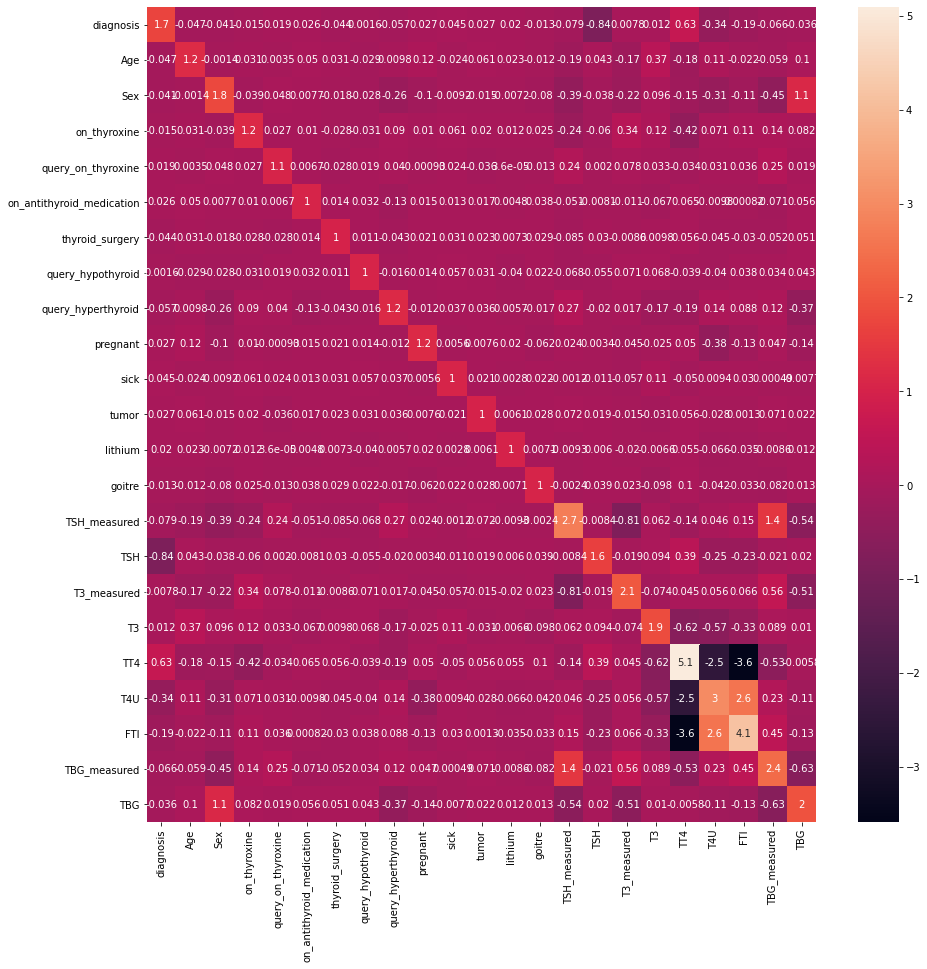

In [28]:
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
plt.figure(figsize = (15, 15))
sns.heatmap(vif, annot = True)
plt.show()

The 'TT4' variable is slightly above the threshhold for moderate correlation so we have to drop it.

In [29]:
df.drop(columns = ['TT4'], inplace = True)

# 4. Data Modeling

In [30]:
# get records where 'diagnosis' == 'hypothyroid'
hypothyroid = df.loc[df['diagnosis'] == 1.0]

# get the same number of records for patients who have 'negative' as their diagnosis
negative = df.loc[df['diagnosis'] == 0.0]
negative = negative.sample(hypothyroid.shape[0]) 

# combining both
data = pd.DataFrame(pd.concat([hypothyroid, negative]), columns = df.columns)
data.sample(3)

,diagnosis,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,T4U,FTI,TBG_measured,TBG,age_group
56,1.0,53.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,165.0,1.0,0.4,1.19,14.0,0.0,27.8,Seniors
0,1.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,1.0,0.6,1.48,10.0,0.0,45.0,Elderly
1471,0.0,34.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,1.0,1.9,0.84,105.0,0.0,27.8,Youth


In [31]:
# previewing distribution of target variable
data.diagnosis.value_counts()

0.0    141
1.0    141
Name: diagnosis, dtype: int64

In [32]:
# reshuffle the dataset
data = data.sample(frac = 1)

# drop the 'age_group' variable, and separate the dataset into features (X) and target (y)
X = data.drop(columns = ['diagnosis', 'age_group']).values
y = data['diagnosis'].values

# split into 75-25 training and test sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = .25, random_state = 7,
                                      stratify = data['diagnosis'])


In [33]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4.1 Decision Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
dt_cm = confusion_matrix(y_test, dt_pred)
print(pd.crosstab(y_test, dt_pred, rownames = ['Actual Results'], colnames = ['Predicted Results'],
                  margins = True))
print()

True_0 = dt_cm[0,0]
False_0 = dt_cm[0,1]
False_1 = dt_cm[1,0]
True_1 = dt_cm[1,1]

print("The decision tree classifier has correctly predicted 'negative' for {} of the {} 'negative' cases, \
      and {} out of {} 'hypothyroid' cases.".format(True_0, True_0 + False_0, True_1, True_1 + False_1))

Predicted Results  0.0  1.0  All
Actual Results                  
0.0                 33    2   35
1.0                  2   34   36
All                 35   36   71

The decision tree classifier has correctly predicted 'negative' for 33 of the 35 'negative' cases,       and 34 out of 36 'hypothyroid' cases.


In [35]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        35
         1.0       0.94      0.94      0.94        36

    accuracy                           0.94        71
   macro avg       0.94      0.94      0.94        71
weighted avg       0.94      0.94      0.94        71



## 4.2. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print(pd.crosstab(y_test, rf_pred, rownames = ['Actual Results'], colnames = ['Predicted Results'],
                  margins = True))
print()

True_0 = rf_cm[0,0]
False_0 = rf_cm[0,1]
False_1 = rf_cm[1,0]
True_1 = rf_cm[1,1]

print("The random forest classifier has correctly predicted 'negative' for {} of the {} 'negative' cases, \
      and {} out of {} 'hypothyroid' cases.".format(True_0, True_0 + False_0, True_1, True_1 + False_1))

Predicted Results  0.0  1.0  All
Actual Results                  
0.0                 34    1   35
1.0                  0   36   36
All                 34   37   71

The random forest classifier has correctly predicted 'negative' for 34 of the 35 'negative' cases,       and 36 out of 36 'hypothyroid' cases.


In [37]:
# classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        35
         1.0       0.97      1.00      0.99        36

    accuracy                           0.99        71
   macro avg       0.99      0.99      0.99        71
weighted avg       0.99      0.99      0.99        71



## 4.3. K-Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)
print(pd.crosstab(y_test, knn_pred, rownames = ['Actual Results'], colnames = ['Predicted Results'],
                  margins = True))
print()

True_0 = knn_cm[0,0]
False_0 = knn_cm[0,1]
False_1 = knn_cm[1,0]
True_1 = knn_cm[1,1]

print("The K-Nearest Neighbors classifier has correctly predicted 'negative' for {} of the {} 'negative' cases, \
      and {} out of {} 'hypothyroid' cases.".format(True_0, True_0 + False_0, True_1, True_1 + False_1))

Predicted Results  0.0  1.0  All
Actual Results                  
0.0                 30    5   35
1.0                  7   29   36
All                 37   34   71

The K-Nearest Neighbors classifier has correctly predicted 'negative' for 30 of the 35 'negative' cases,       and 29 out of 36 'hypothyroid' cases.


In [39]:
# classificaation report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        35
         1.0       0.85      0.81      0.83        36

    accuracy                           0.83        71
   macro avg       0.83      0.83      0.83        71
weighted avg       0.83      0.83      0.83        71



## 4.4. Making predictions

In order to evaluate whether our models are performing as well as expected, we will run them on a subset of the original dataset called 'no_hypothyroidism' which will contain only the records of the patients who have a diagnosis of "negative". The model's performance would be judged based on how many 'negative' diagnoses it predicts as 'hypothyroid'.

In [40]:
# creating the dataset subset
no_hypothyroidism = df.loc[df['diagnosis'] == 0.0]

# saving the 'diagnosis' values
negative_diagnosis = no_hypothyroidism['diagnosis']

# dropping unnecessary columns
no_hypothyroidism.drop(columns = ['diagnosis', 'age_group'], inplace = True)

# obtain only the values and scale
no_hypothyroidism = no_hypothyroidism.values
no_hypothyroidism = scaler.transform(no_hypothyroidism)

### 4.4.1 Decision Trees

In [41]:
# predict using Decision Tree algorithm
dt_pred_final = dt.predict(no_hypothyroidism)
dt_cm_final = confusion_matrix(negative_diagnosis, dt_pred_final)
dt_wrong = dt_cm_final[0, 1]
dt_total = dt_cm_final[0, 0] + dt_cm_final[0, 1]
print(dt_cm_final)
print("The decision tree classifier misclassified {} 'hypothyroid' diagnoses out of {} total \
diagnoses.".format(dt_wrong, dt_total))

[[2861   84]
 [   0    0]]
The decision tree classifier misclassified 84 'hypothyroid' diagnoses out of 2945 total diagnoses.


### 4.4.2 Random Forest



In [42]:
# predict using Random Forest algorithm
rf_pred_final = rf.predict(no_hypothyroidism)
rf_cm_final = confusion_matrix(negative_diagnosis, rf_pred_final)
rf_wrong = rf_cm_final[0, 1]
rf_total = rf_cm_final[0, 0] + rf_cm_final[0, 1]
print(rf_cm_final)
print("The random forest classifier misclassified {} 'hypothyroid' diagnoses out of {} total \
diagnoses.".format(rf_wrong, rf_total))

[[2865   80]
 [   0    0]]
The random forest classifier misclassified 80 'hypothyroid' diagnoses out of 2945 total diagnoses.


### 4.4.3 K-Nearest Neighbor

In [43]:
# predict using Decision Tree algorithm
knn_pred_final = knn.predict(no_hypothyroidism)
knn_cm_final = confusion_matrix(negative_diagnosis, knn_pred_final)
knn_wrong = knn_cm_final[0, 1]
knn_total = knn_cm_final[0, 0] + knn_cm_final[0, 1]
print(knn_cm_final)
print("The k-nearest neighbor classifier misclassified {} 'hypothyroid' diagnoses out of {} total \
diagnoses.".format(knn_wrong, knn_total))

[[2540  405]
 [   0    0]]
The k-nearest neighbor classifier misclassified 405 'hypothyroid' diagnoses out of 2945 total diagnoses.



# 5. Summary & Recommendations
From the above modeling attempts, we see that the random forest is the best performing algorithm out of the three models due to it falsely labeling fewer 'negative' diagnoses as 'hypothyroid' than the other algorithms, i.e., it made fewer false positives (Type I errors) than the other algorithms. And this is important in medicine so as not to wrongfully diagnose someone with a condition they do not have.

It is worth noting that the model itself is not perfect and that further measures can be taken to improve it, such as trying out Support Vector Machine, or applying bagging or boosting techniques to the algorithm.